# Autoencoder

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import  Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,_), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32')/255

x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor *np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor* np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.0,1.0)
x_test_noisy = np.clip(x_test_noisy,0.0,1.0)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


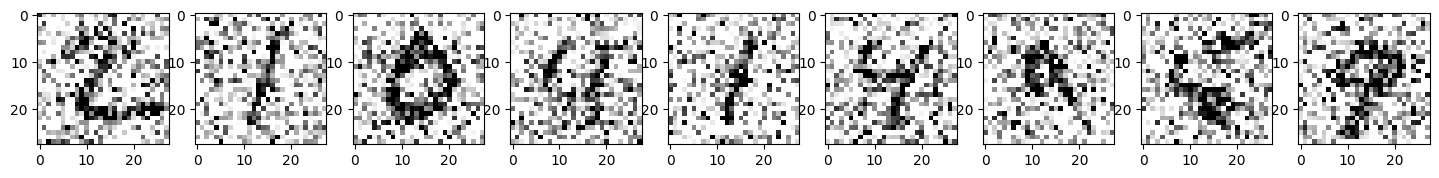

In [ ]:
plt.figure(figsize = (20,2))
for i in range(1,10):
  ax = plt.subplot(1,10,i)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='binary')
plt.show()

In [ ]:
model = Sequential()
#encoder
model.add(Conv2D(32,(3,3), activation= 'relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
#decoder
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 8)           │           2,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,032 (35.28 KB)

 Trainable params: 9,032 (35.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train_noisy,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test_noisy,x_test))
model.evaluate(x_test_noisy,x_test)
model.save('denoising_autoencoder.h5')
mo_noise_img = model.predict(x_test_noisy)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 574ms/step - loss: 0.0787 - val_loss: 0.0583
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 539ms/step - loss: 0.0568 - val_loss: 0.0536
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 544ms/step - loss: 0.0525 - val_loss: 0.0508
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 526ms/step - loss: 0.0502 - val_loss: 0.0491
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 564ms/step - loss: 0.0488 - val_loss: 0.0482
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 526ms/step - loss: 0.0478 - val_loss: 0.0474
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 526ms/step - loss: 0.0478 - val_loss: 0.0474
Epoch 7/10
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 563ms/step - loss: 0.0472 - val_loss: 0.0469
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 563ms/step - loss: 0.0472 - val_loss: 0.0469
Epoch 8/10
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 548ms/step - loss: 0.0465 - val_loss: 0.0463
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 548ms/step - loss: 0.0465 - val_loss: 0.0463
Epoch 9/10
Epoch 9/10

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


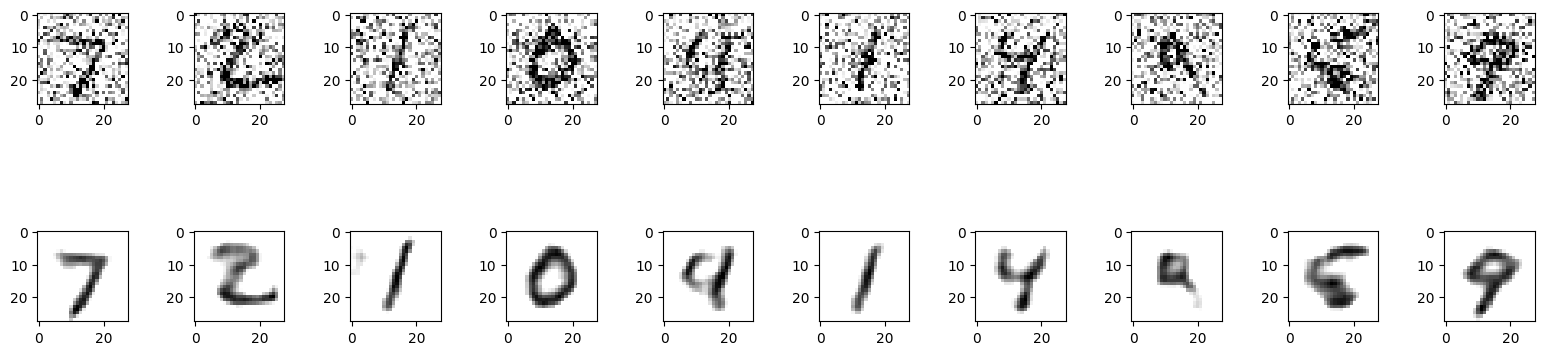

In [ ]:
plt.figure(figsize = (40,4))
for i in range(10):
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='binary')
  ax = plt.subplot(3,20,40+i+1)
  plt.imshow(mo_noise_img[i][:,:,0],cmap='binary')
plt.show()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import  Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,_), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32')/255

X_train = np.reshape(X_train, (len(X_train),28,28,1))                # reshaped to have a shape of (28, 28, 1) to match the expected input for a (CNN), where 1 -grayscale channel.
X_test = np.reshape(X_test, (len(X_test),28,28,1))

noise_factor = 0.5                                                  # Noise is added to the images by generating Gaussian noise (random normal values) and scaling them by a factor of 0.5.
X_train_noisy = X_train + noise_factor *np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_test_noisy = X_test + noise_factor* np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)
                                                                      # noise is added to both the training and test images

X_train_noisy = np.clip(X_train_noisy,0.0,1.0)                     #  noisy img are clipped to ensure that pixel values remain within the [0, 1] range, preventing invalid pixel values outside this range.
X_test_noisy = np.clip(X_test_noisy,0.0,1.0)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


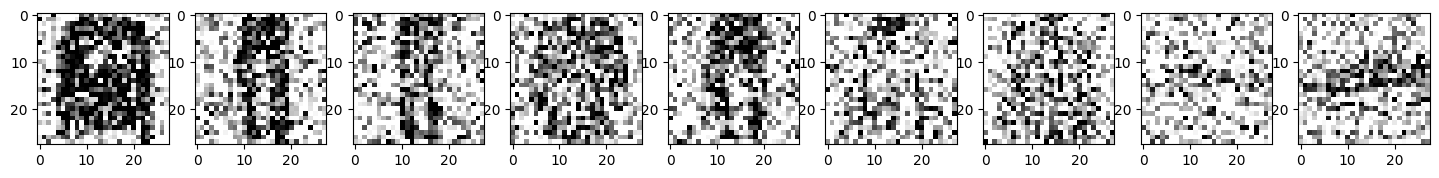

In [ ]:
#  Displaying Noisy Test Images:

plt.figure(figsize = (20,2))
for i in range(1,10):
  aax = plt.subplot(1,10,i)
  plt.imshow(X_test_noisy[i].reshape(28,28),cmap='binary')
plt.show()

In [ ]:
# Building the Denoising Autoencoder Model:

# Encoder:
#   Conv2D layers apply convolution to extract features from the image.
#   MaxPooling2D layers downsample the feature maps, reducing spatial dimensions while retaining important information.

# Decoder:
#   Conv2D layers attempt to reconstruct the image from the compressed representation.
#   UpSampling2D layers increase the spatial resolution of the feature maps.
#   The decoder progressively upsamples the data to the original size (28x28).
#   The architecture of the model is:

# 3 Conv2D layers (downsampling with MaxPooling) for encoding.
# 3 Conv2D layers (upsampling with UpSampling2D) for decoding.


model = Sequential()
#encoder
model.add(Conv2D(32,(3,3), activation= 'relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
#decoder
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')      # MSE is commonly used for regression tasks and is appropriate for denoising autoencoders
                                                               # since it penalizes differences between the input (noisy image) and output (denoised image).
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 8)           │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 8)           │           2,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,032 (35.28 KB)

 Trainable params: 9,032 (35.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_noisy,X_train,epochs=10,batch_size=256,shuffle=True,validation_data=(X_test_noisy,X_test))
model.evaluate(X_test_noisy,X_test)
model.save('denoising_autoencoder.h5')
no_noise_img = model.predict(X_test_noisy)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 521ms/step - loss: 0.0844 - val_loss: 0.0314
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 526ms/step - loss: 0.0301 - val_loss: 0.0275
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 545ms/step - loss: 0.0271 - val_loss: 0.0260
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 522ms/step - loss: 0.0258 - val_loss: 0.0251
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 159s 594ms/step - loss: 0.0249 - val_loss: 0.0246
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 540ms/step - loss: 0.0243 - val_loss: 0.0239
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 523ms/step - loss: 0.0237 - val_loss: 0.0237
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 577ms/step - loss: 0.0233 - val_loss: 0.0230
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 542ms/step - loss: 0.0229 - val_loss: 0.0226
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 569ms/step - loss: 0.0224 - val_loss: 0.0223
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0223


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


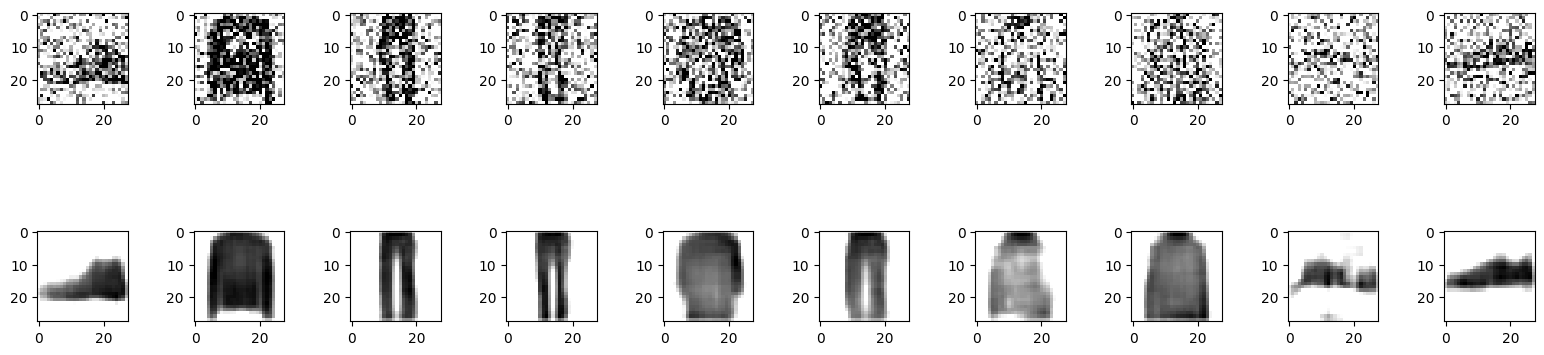

In [ ]:
plt.figure(figsize = (40,4))
for i in range(10):
  aax = plt.subplot(3,20,i+1)
  plt.imshow(X_test_noisy[i].reshape(28,28),cmap='binary')
  aax = plt.subplot(3,20,40+i+1)
  plt.imshow(no_noise_img[i][:,:,0],cmap='binary')
plt.show()

Data Preparation:


MNIST images are loaded, normalized, and reshaped.
Noise (Gaussian) is added to the images to simulate real-world noisy data.

*   List item
*   List item


Model Architecture:

The autoencoder consists of two parts:
Encoder: Uses convolutional layers to compress the input image into a lower-dimensional representation.
Decoder: Uses convolutional layers and upsampling to reconstruct the original image from the compressed representation.
Training:

The model is trained on noisy images and learns to predict the clean original images using Mean Squared Error (MSE) as the loss function.
Evaluation:

After training, the model is evaluated by testing it on noisy test images and comparing its output with the clean images.
Visualization:

The noisy and denoised images are displayed side by side to visually assess how well the model has learned to remove noise.